In [ ]:
import pandas as pd

df = pd.read_csv("ratings_analysis.csv")

In [ ]:
df.head(10)

tconst titleType                                 primaryTitle  \
0  tt0000001     short                                   Carmencita   
1  tt0000002     short                       Le clown et ses chiens   
2  tt0000003     short                                 Poor Pierrot   
3  tt0000004     short                                  Un bon bock   
4  tt0000005     short                             Blacksmith Scene   
5  tt0000006     short                            Chinese Opium Den   
6  tt0000007     short  Corbett and Courtney Before the Kinetograph   
7  tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8  tt0000009     movie                                   Miss Jerry   
9  tt0000010     short                          Leaving the Factory   

   startYear runtimeMinutes                    genres  averageRating  numVotes  
0     1894.0              1         Documentary,Short            5.7      2100  
1     1892.0              5           Animation,Short            5.6       282  
2     1892.0              5  Animation,Comedy,Romance            6.5      2119  
3     1892.0             12           Animation,Short            5.4       182  
4     1893.0              1              Comedy,Short            6.2      2851  
5     1894.0              1                     Short            5.0       200  
6     1894.0              1               Short,Sport            5.4       891  
7     1894.0              1         Documentary,Short            5.4      2248  
8     1894.0             45                   Romance            5.4       215  
9     1895.0              1         Documentary,Short            6.8      7753

In [ ]:
df.tail(10)

tconst  titleType                primaryTitle  startYear  \
472737   tt1014652  tvEpisode              Future Changes     2006.0   
472738   tt1014653  tvEpisode             Generation neXt     2006.0   
472739   tt1014654  tvEpisode        Heart of Ice: Part 1     2006.0   
472740   tt1014655  tvEpisode        Heart of Ice: Part 2     2006.0   
472741   tt1014656  tvEpisode           It's All Relative     2006.0   
472742   tt1014657  tvEpisode                 Pro-Dueling     2006.0   
472743   tt1014658  tvEpisode                Rah, Rah Ra!     2006.0   
472744  tt10146586      movie  Minecraft: Into the Nether     2015.0   
472745   tt1014659  tvEpisode         The Art of the Duel     2006.0   
472746   tt1014660  tvEpisode              The Dark Light     2006.0   

       runtimeMinutes                      genres  averageRating  numVotes  
472737             20  Action,Adventure,Animation            7.9        64  
472738             21  Action,Adventure,Animation            8.0        65  
472739             20  Action,Adventure,Animation            7.9        67  
472740             30  Action,Adventure,Animation            8.0        67  
472741             21  Action,Adventure,Animation            7.6        66  
472742             21  Action,Adventure,Animation            7.7        66  
472743             21  Action,Adventure,Animation            7.9        67  
472744             77                 Documentary            6.6        13  
472745             21  Action,Adventure,Animation            7.2        65  
472746             21  Action,Adventure,Animation            7.8        63

In [ ]:
df.shape

(472747, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472747 entries, 0 to 472746
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          472747 non-null  object 
 1   titleType       472747 non-null  object 
 2   primaryTitle    472747 non-null  object 
 3   startYear       472722 non-null  float64
 4   runtimeMinutes  472747 non-null  object 
 5   genres          472747 non-null  object 
 6   averageRating   472747 non-null  float64
 7   numVotes        472747 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 28.9+ MB


In [ ]:
df.isna().sum()

tconst             0
titleType          0
primaryTitle       0
startYear         25
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
dtype: int64

In [ ]:
 df1 = df.copy()

In [ ]:
df1['startYear']=df['startYear'].fillna(0)


In [ ]:
df1['startYear'].isna().sum()

0

In [ ]:
df.shape

(472747, 8)

In [ ]:
print(df.isna().sum())

tconst             0
titleType          0
primaryTitle       0
startYear         25
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
dtype: int64


In [ ]:
 df1 = df.copy()

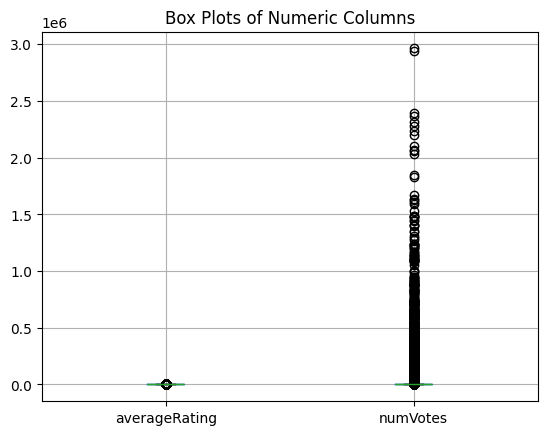

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = ['runtimeMinutes', 'averageRating', 'numVotes']
df1[num_cols].boxplot()
plt.title("Box Plots of Numeric Columns")
plt.show()

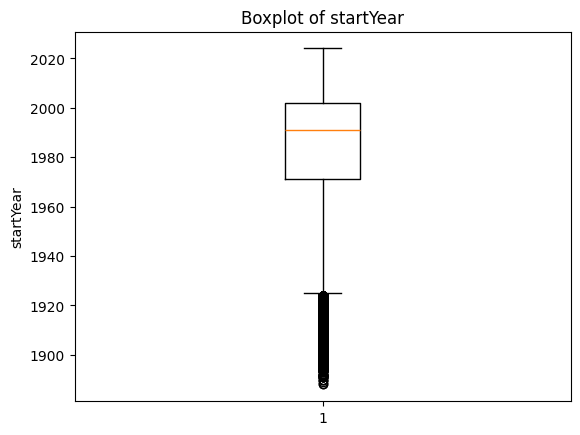

In [ ]:
plt.boxplot(df['startYear'].dropna())
plt.title('Boxplot of startYear')
plt.ylabel('startYear')
plt.show()

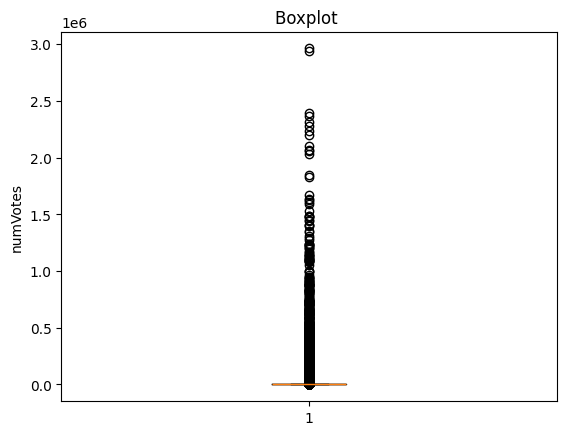

In [ ]:
plt.boxplot(df['numVotes'].dropna())
plt.title('Boxplot ')
plt.ylabel('numVotes')
plt.show()

In [ ]:
df1['startYear'] = pd.to_numeric(df1['startYear'], errors='coerce')
df1['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
df1.dropna(subset=['averageRating', 'numVotes'], inplace=True)

In [ ]:
print(df1[['averageRating','numVotes','runtimeMinutes','startYear']].describe())


       averageRating      numVotes  runtimeMinutes      startYear
count  472747.000000  4.727470e+05   382412.000000  472722.000000
mean        6.703200  1.634125e+03       63.001425    1983.966587
std         1.302287  2.531435e+04       47.650899      22.563132
min         1.000000  5.000000e+00        0.000000    1888.000000
25%         5.900000  1.700000e+01       29.000000    1971.000000
50%         6.900000  4.300000e+01       60.000000    1991.000000
75%         7.600000  1.550000e+02       90.000000    2002.000000
max        10.000000  2.963270e+06     5220.000000    2024.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df1['averageRating'], bins=20, kde=True)
plt.title("Distribution of IMDb Ratings")
plt.show()


In [ ]:
corr_matrix = df1[['averageRating','numVotes','runtimeMinutes','startYear']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()


                averageRating  numVotes  runtimeMinutes  startYear
averageRating        1.000000  0.027377       -0.167250   0.151348
numVotes             0.027377  1.000000        0.065668   0.029338
runtimeMinutes      -0.167250  0.065668        1.000000   0.019097
startYear            0.151348  0.029338        0.019097   1.000000


In [ ]:
df1['primaryGenre'] = df1['genres'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)
genre_stats = df1.groupby('primaryGenre').agg({
    'averageRating': 'mean',
    'numVotes': 'mean',
    'tconst': 'count'
}).rename(columns={'tconst': 'titleCount'}).reset_index()
genre_stats.sort_values('averageRating', ascending=False, inplace=True)
print(genre_stats.head(10))


   primaryGenre  averageRating     numVotes  titleCount
27      Western       7.176482   137.740480        9244
15        Music       7.101094    69.377863        3930
7   Documentary       6.991876   169.294444       33137
6         Crime       6.971794  2185.476352       36219
23        Sport       6.928597    98.887067        1098
13      History       6.901778   109.153333         450
4     Biography       6.878353  4860.516730        6814
9        Family       6.801551    99.202742        6126
2     Adventure       6.788089  3294.444614       26144
5        Comedy       6.760726  1284.471209      122818


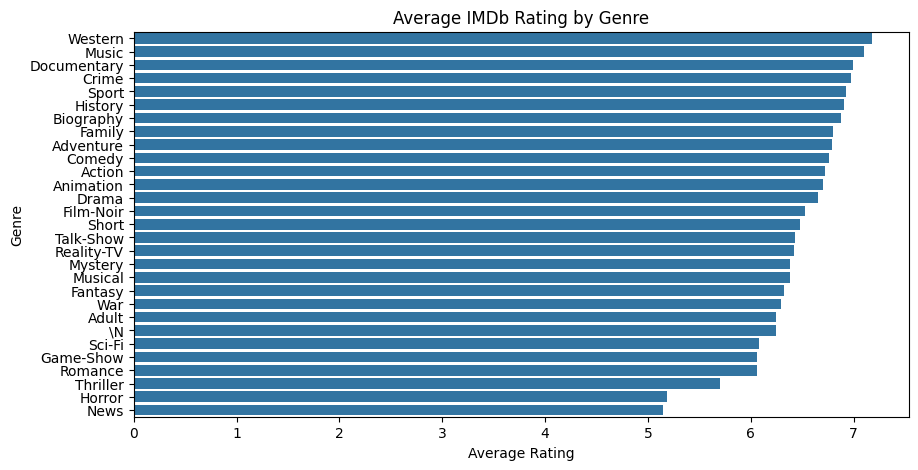

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='averageRating', y='primaryGenre', data=genre_stats, order=genre_stats['primaryGenre'])
plt.title("Average IMDb Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose the above SQL results were exported to a CSV named 'region_popularity.csv'
df_region = pd.read_csv('movie_ratings_region.csv')
# This CSV might have columns like: ['region', 'popular_movie_count']


In [ ]:
df_region.head(10)

tconst                   primaryTitle  startYear  averageRating  \
0  tt0000009                     Miss Jerry       1894            5.4   
1  tt0000009                     Miss Jerry       1894            5.4   
2  tt0000009                     Miss Jerry       1894            5.4   
3  tt0000009                     Miss Jerry       1894            5.4   
4  tt0000009                     Miss Jerry       1894            5.4   
5  tt0000147  The Corbett-Fitzsimmons Fight       1897            5.2   
6  tt0000147  The Corbett-Fitzsimmons Fight       1897            5.2   
7  tt0000147  The Corbett-Fitzsimmons Fight       1897            5.2   
8  tt0000502                       Bohemios       1905            4.4   
9  tt0000502                       Bohemios       1905            4.4   

   numVotes region  
0       215     AU  
1       215     DE  
2       215     HU  
3       215     US  
4       215     \N  
5       539     RU  
6       539     US  
7       539     \N  
8        18     ES  
9        18     \N

In [ ]:
df_movies = pd.read_csv('/content/popular_movies.csv')

In [ ]:
df_movies.head(10)

tconst                 primaryTitle  startYear  averageRating  numVotes  \
0  tt0010323  The Cabinet of Dr. Caligari       1920            8.0     71975   
1  tt0010323  The Cabinet of Dr. Caligari       1920            8.0     71975   
2  tt0010323  The Cabinet of Dr. Caligari       1920            8.0     71975   
3  tt0010323  The Cabinet of Dr. Caligari       1920            8.0     71975   
4  tt0010323  The Cabinet of Dr. Caligari       1920            8.0     71975   
5  tt0010323  The Cabinet of Dr. Caligari       1920            8.0     71975   
6  tt0010323  The Cabinet of Dr. Caligari       1920            8.0     71975   
7  tt0010323  The Cabinet of Dr. Caligari       1920            8.0     71975   
8  tt0010323  The Cabinet of Dr. Caligari       1920            8.0     71975   
9  tt0010323  The Cabinet of Dr. Caligari       1920            8.0     71975   

  region  
0     AR  
1     AU  
2     BG  
3     BR  
4     CA  
5     CA  
6     CZ  
7     DE  
8     DE  
9     DK

In [ ]:
total_by_region = (
    df_region
    .groupby('region')['tconst']
    .nunique()
    .reset_index(name='total_titles')
)

print(total_by_region.head(10))


  region  total_titles
0     AE           830
1     AF             6
2     AL           105
3     AM            33
4     AO             4
5     AR         11977
6     AT          7876
7     AU         15765
8     AZ           326
9     BA            82


In [ ]:
pop_by_region = (
    df_movies
    .groupby('region')['tconst']
    .nunique()
    .reset_index(name='popular_titles')
)

print(pop_by_region.head(10))


  region  popular_titles
0     AE             231
1     AL              17
2     AM               2
3     AR             403
4     AT             222
5     AU             412
6     AZ             160
7     BA               4
8     BD               7
9     BE             163


In [ ]:
region_stats = total_by_region.merge(pop_by_region, on='region', how='left')
region_stats['popular_titles'] = region_stats['popular_titles'].fillna(0)

region_stats['popularity_ratio'] = (
    region_stats['popular_titles'] / region_stats['total_titles']
)

region_stats = region_stats.sort_values('popularity_ratio', ascending=False)
region_stats.head(10)


region  total_titles  popular_titles  popularity_ratio
70      KG             5             4.0          0.800000
112     QA             6             4.0          0.666667
101     NP             3             2.0          0.666667
136     UZ           359           182.0          0.506964
126     TJ             6             3.0          0.500000
129     TO             2             1.0          0.500000
74      KZ           332           163.0          0.490964
8       AZ           326           160.0          0.490798
53      GT            14             6.0          0.428571
21      CG             5             2.0          0.400000

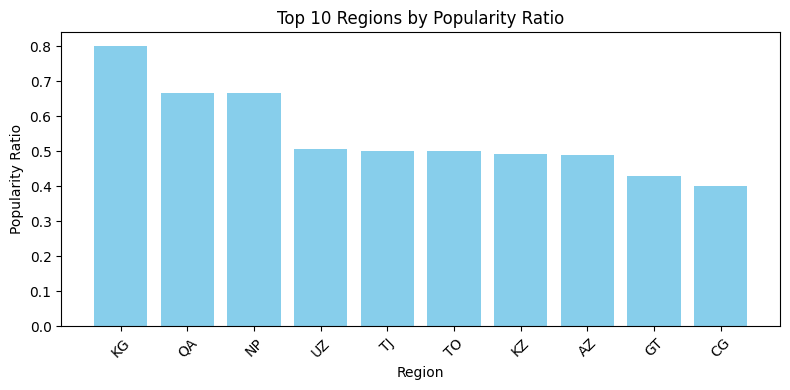

In [ ]:
import matplotlib.pyplot as plt
top10 = region_stats.head(10)
plt.figure(figsize=(8,4))
plt.bar(top10['region'], top10['popularity_ratio'], color='skyblue')
plt.title("Top 10 Regions by Popularity Ratio")
plt.xlabel("Region")
plt.ylabel("Popularity Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("high_rated_movies_cast_test.csv")

person_counts = df.groupby(['nconst', 'primaryName', 'category'])['tconst'].nunique()
person_counts = person_counts.reset_index(name='num_high_rated_movies')

top_people = person_counts.sort_values('num_high_rated_movies', ascending=False)
print(top_people.head(20))


       nconst             primaryName  category  num_high_rated_movies
0   nm0000356           Sybil Danning   actress                     19
1   nm0000434             Mark Hamill     actor                      7
24  nm0958249             Karol Beffa  composer                      1
23  nm0953125         Harrison Zanuck     actor                      1
22  nm0923928          Nicola Wheeler   actress                      1
21  nm0901552       Ekaterina Volkova   actress                      1
20  nm0780435           Ryan Seacrest      self                      1
19  nm0747328            Rosita Royce      self                      1
18  nm0735348          Ivan Rodriguez     actor                      1
17  nm0607510           Joshua Morrow     actor                      1
16  nm0601168         Elizabeth Moore   actress                      1
15  nm0554788            Óscar Martín     actor                      1
14  nm0549460  Publius Vergilius Maro    writer                      1
13  nm

In [ ]:
# Example structure of df after grouping
df.head()


tconst           primaryTitle  averageRating     nconst  category  \
0  tt0004286  The Magic Cloak of Oz            5.2  nm0522550   actress   
1  tt0015214          The Crazy Ray            7.1  nm0958249  composer   
2  tt0035423         Kate & Leopold            6.4  nm0005227     actor   
3  tt0044298                  Today            4.6  nm0004856      self   
4  tt0044298                  Today            4.6  nm0004856      self   

         primaryName  
0  Jacqueline Lovell  
1        Karol Beffa  
2      Breckin Meyer  
3        Carson Daly  
4        Carson Daly

In [ ]:
df_actors = df[df['category'] == 'actor'].copy()
df_directors = df[df['category'] == 'director'].copy()

In [ ]:
print(df_actors.columns)

Index(['tconst', 'primaryTitle', 'averageRating', 'nconst', 'category',
       'primaryName'],
      dtype='object')


In [45]:
import pandas as pd

df11 = "/content/basics_ratings.csv"
data1 = pd.read_csv(df11)

In [37]:
data1.head(10)

tconst runtimeMinutes  averageRating
0  tt0000001              1            5.7
1  tt0000002              5            5.6
2  tt0000003              5            6.5
3  tt0000004             12            5.4
4  tt0000005              1            6.2
5  tt0000006              1            5.0
6  tt0000007              1            5.4
7  tt0000008              1            5.4
8  tt0000009             45            5.4
9  tt0000010              1            6.8

In [38]:
data1.tail(10)

tconst runtimeMinutes  averageRating
472737   tt1014652             20            7.9
472738   tt1014653             21            8.0
472739   tt1014654             20            7.9
472740   tt1014655             30            8.0
472741   tt1014656             21            7.6
472742   tt1014657             21            7.7
472743   tt1014658             21            7.9
472744  tt10146586             77            6.6
472745   tt1014659             21            7.2
472746   tt1014660             21            7.8

In [47]:
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')

In [48]:
print(df['runtimeMinutes'].dtype)
df['runtimeMinutes'].isna().sum()  # count how many became NaN


float64


90335

In [49]:
df.dropna(subset=['runtimeMinutes'], inplace=True)

In [50]:
import pandas as pd

bins = [0, 30, 60, 120, 180, 9999]
labels = ["0-30", "31-60", "61-120", "121-180", "180+"]

df['runtimeRange'] = pd.cut(
    df['runtimeMinutes'],
    bins=bins,
    labels=labels,
    include_lowest=True
)


In [51]:
range_stats = df.groupby('runtimeRange').agg({
    'averageRating': 'mean',
    'runtimeMinutes': 'count'  # optional, to see how many titles
}).rename(columns={'runtimeMinutes': 'titles_count'})

range_stats.sort_values('averageRating', ascending=False, inplace=True)
print(range_stats)


              averageRating  titles_count
runtimeRange                             
31-60              7.197245         80989
180+               7.053120          3590
0-30               7.003970        129041
121-180            6.698743         15587
61-120             6.083096        153205


<ipython-input-51-f55b7b372345>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_stats = df.groupby('runtimeRange').agg({


In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(range_stats.index, range_stats['averageRating'], color='skyblue')
plt.title("Average Ratings by Runtime Range")
plt.xlabel("Runtime Range (minutes)")
plt.ylabel("Average Rating")
plt.show()

In [2]:
import pandas as pd

df = pd.read_csv("/content/genre_ratings.csv")



In [3]:
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')
df['numVotes'] = pd.to_numeric(df['numVotes'], errors='coerce')

In [4]:
df['genres_split'] = df['genres'].str.split(',')
df_exploded = df.explode('genres_split').rename(columns={'genres_split': 'genre'})


In [5]:
genre_year_stats = (
    df_exploded
    .groupby(['startYear', 'genre'])
    .agg(
        avg_rating=('averageRating', 'mean'),
        avg_votes=('numVotes', 'mean'),
        count_titles=('tconst', 'nunique')
    )
    .reset_index()
)


In [6]:

top_genre_per_year = genre_year_stats.loc[
    genre_year_stats.groupby('startYear')['avg_rating'].idxmax()
]


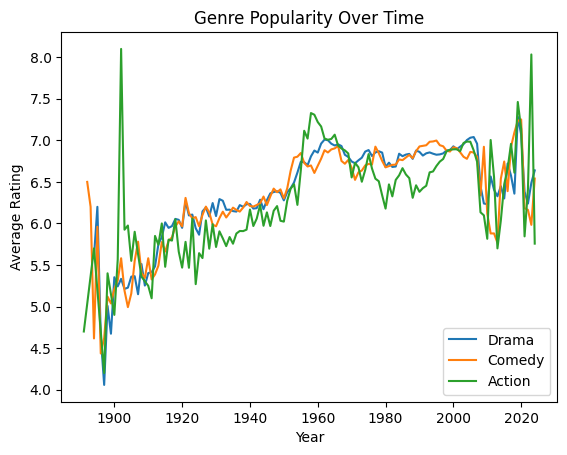

In [8]:
import matplotlib.pyplot as plt

some_genres = ['Drama', 'Comedy', 'Action']
df_subset = genre_year_stats[genre_year_stats['genre'].isin(some_genres)]

for genre in some_genres:
    sub = df_subset[df_subset['genre'] == genre]
    plt.plot(sub['startYear'], sub['avg_rating'], label=genre)

plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Genre Popularity Over Time")
plt.legend()
plt.show()


In [18]:
import pandas as pd

# Load the dataset
new_name_basics = "/content/name.basics.csv"
data = pd.read_csv(new_name_basics)

In [19]:
data.head(10)

nconst              primaryName birthYear deathYear  \
0  nm0000103             Fairuza Balk      1974        \N   
1  nm0000106           Drew Barrymore      1975        \N   
2  nm0000117            Neve Campbell      1973        \N   
3  nm0000138        Leonardo DiCaprio      1974        \N   
4  nm0000139             Cameron Diaz      1972        \N   
5  nm0000170           Milla Jovovich      1975        \N   
6  nm0000179                 Jude Law      1972        \N   
7  nm0000189  Jenny McCarthy-Wahlberg      1972        \N   
8  nm0000191            Ewan McGregor      1971        \N   
9  nm0000192            Alyssa Milano      1972        \N   

                    primaryProfession                           knownForTitles  
0  actress,soundtrack,archive_footage  tt0115963,tt0181875,tt0089908,tt0120586  
1           producer,actress,director  tt0160127,tt0151738,tt0343660,tt0120631  
2             actress,producer,writer  tt0117571,tt0120082,tt0134084,tt0120890  
3               producer,actor,writer  tt1375666,tt0120338,tt0407887,tt0993846  
4         actress,producer,soundtrack  tt0259711,tt0129387,tt0160127,tt0119738  
5           actress,producer,director  tt0119116,tt1220634,tt0120804,tt1220198  
6             actor,producer,director  tt0134119,tt0376541,tt2278388,tt0346156  
7             actress,producer,writer  tt0327643,tt0455967,tt0134084,tt0131857  
8               actor,producer,writer  tt0203009,tt0117951,tt1322269,tt0120915  
9             actress,producer,writer  tt0158552,tt0086827,tt0088944,tt0116287

In [4]:
import pandas as pd

new_name_basics = "/content/name.basics.csv"
data = pd.read_csv(new_name_basics)

data = data.drop(columns=["deathYear"])

print(data.head())

      nconst        primaryName birthYear                   primaryProfession  \
0  nm0000103       Fairuza Balk      1974  actress,soundtrack,archive_footage   
1  nm0000106     Drew Barrymore      1975           producer,actress,director   
2  nm0000117      Neve Campbell      1973             actress,producer,writer   
3  nm0000138  Leonardo DiCaprio      1974               producer,actor,writer   
4  nm0000139       Cameron Diaz      1972         actress,producer,soundtrack   

                            knownForTitles  
0  tt0115963,tt0181875,tt0089908,tt0120586  
1  tt0160127,tt0151738,tt0343660,tt0120631  
2  tt0117571,tt0120082,tt0134084,tt0120890  
3  tt1375666,tt0120338,tt0407887,tt0993846  
4  tt0259711,tt0129387,tt0160127,tt0119738  


In [47]:
import pandas as pd


new_name_basics = "/content/name.basics.csv"
data = pd.read_csv(new_name_basics)

output_file = "/content/name.basics_updated.csv"
data.to_csv(output_file, index=False)

In [48]:
import pandas as pd


df2 = "/content/name.basics_updated.csv"
data = pd.read_csv(df2)


subset = data.head(2000)

subset.to_csv("subset_new_name_basics.csv", index=False)

print("First 500 rows extracted and saved")

First 500 rows extracted and saved


In [10]:
df3 = "/content/subset_new_name_basics.csv"
data = pd.read_csv(df3)

In [13]:
data.shape

(500, 5)

In [15]:
import pandas as pd
import json


df4 = pd.read_csv("/content/subset_new_name_basics.csv")

df4.head()

json_output=('Output_json.json')
data_json = df4.to_json(json_output, indent=1, orient="records")

In [24]:
import pandas as pd
import json

df4 = pd.read_csv("/content/subset_new_name_basics.csv")

json_name_basics = "/content/json_name_basics.json"
df4.to_json(json_name_basics, orient="records", indent=1)


In [55]:
import pandas as pd


df5 = "/content/title.basics.csv"
data = pd.read_csv(df5)

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode, split, desc

spark = SparkSession.builder.appName("HighRatedGenres").getOrCreate()

title_basics = spark.read.csv("title.basics.csv", header=True, inferSchema=True)
title_ratings = spark.read.csv("title.ratings.csv", header=True, inferSchema=True)

joined_df = title_basics.join(title_ratings, on="tconst", how="inner")

high_rated_df = joined_df.filter(col("averageRating") >= 8.0)


genres_exploded = high_rated_df.withColumn(
    "genre",
    explode(split(col("genres"), ","))
)

genre_counts = (
    genres_exploded.groupBy("genre")
    .count()
    .orderBy(desc("count"))
)

genre_counts.show(10, truncate=False)




+-----------+-----+
|genre      |count|
+-----------+-----+
|Drama      |28763|
|Comedy     |24159|
|Crime      |9905 |
|Documentary|9223 |
|Family     |8666 |
|Action     |8400 |
|Adventure  |8389 |
|Animation  |5941 |
|Short      |5871 |
|Romance    |5077 |
+-----------+-----+
only showing top 10 rows



In [57]:
import pandas as pd

data = pd.read_csv("/content/title.basics.csv")

# Replace '\N' with 1
data['column_name'] = data['column_name'].replace(r'\\N', '1', regex=True)


data.to_csv("updated_dataset.csv", index=False)


KeyError: 'column_name'

In [54]:
import pandas as pd

# Load the dataset
df5 = "/content/title.basics.csv"  # Replace with your file path
data = pd.read_csv(df5)

# Take the first 500 rows
subset = data.head(500)

# Save the subset to a new CSV file (optional)
subset.to_csv("new_title_basics.csv", index=False)

print("First 500 rows extracted and saved!")

First 500 rows extracted and saved!


In [22]:
import pandas as pd
import json

df5 = pd.read_csv("/content/subset_new_title_basics.csv")

json_title_basic= "/content/json_title_basic.json"
df5.to_json(json_title_basic, orient="records", indent=1)

In [45]:
import pandas as pd

# Load the dataset
df6 = "/content/title.principals.csv"  # Replace with your file path
data = pd.read_csv(df6)

# Take the first 500 rows
subset = data.head(2000)

# Save the subset to a new CSV file (optional)
subset.to_csv("/content/new_title.principals.csv", index=False)

print("First 500 rows extracted and saved!")

First 500 rows extracted and saved!


In [27]:
import pandas as pd
import json

df7 = pd.read_csv("/content/new_title.principals.csv")

json_title_principals= "/content/json_title_principals.json"
df7.to_json(json_title_principals, orient="records", indent=1)

In [53]:
import pandas as pd

# Load the dataset
df8 = "/content/title.ratings.csv"  # Replace with your file path
data = pd.read_csv(df8)

# Take the first 500 rows
subset = data.head(500)

# Save the subset to a new CSV file (optional)
subset.to_csv("/content/new_title.ratings.csv", index=False)

print("First 500 rows extracted and saved!")

First 500 rows extracted and saved!


In [29]:
import pandas as pd
import json

df9 = pd.read_csv("/content/new_title.ratings.csv")

json_title_ratings= "/content/json_title_ratings.json"
df9.to_json(json_title_ratings, orient="records", indent=1)

In [2]:
import pandas as pd
import json

df9 = pd.read_csv("/content/movie_ratings.csv")

json_movies= "/content/json_movies.json"
df9.to_json(json_movies, orient="records", indent=1)

In [50]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc, count

# Initialize Spark session
spark = SparkSession.builder.appName("PopularMovies").getOrCreate()

# Load datasets
title_ratings = spark.read.csv("//content/new_title.ratings.csv", header=True, inferSchema=True)
title_principals = spark.read.csv("/content/new_title.principals.csv", header=True, inferSchema=True)
name_basics = spark.read.csv("/content/subset_new_name_basics.csv", header=True, inferSchema=True)

# Filter for popular movies (threshold: averageRating >= 7.5 and numVotes >= 10000)
popular_movies = title_ratings.filter((col("averageRating") >= 7.5) & (col("numVotes") >= 10000))

# Join popular movies with title_principals
popular_movies_principals = popular_movies.join(title_principals, popular_movies.tconst == title_principals.tconst, "inner") \
    .select(title_principals.nconst, title_principals.category)

# Join with name_basics to get individual details
popular_individuals = popular_movies_principals.join(name_basics, popular_movies_principals.nconst == name_basics.nconst, "inner") \
    .select(name_basics.primaryName, name_basics.primaryProfession, popular_movies_principals.category)

# Count the number of popular movies for each individual
popular_individuals_count = popular_individuals.groupBy("primaryName", "primaryProfession") \
    .agg(count("*").alias("popularMoviesCount")) \
    .orderBy(desc("popularMoviesCount"))

# Show top 10 individuals associated with the highest number of popular movies
popular_individuals_count.show(10)


Py4JJavaError: An error occurred while calling o642.csv.
: org.apache.hadoop.fs.UnsupportedFileSystemException: No FileSystem for scheme "null"
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3443)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$checkAndGlobPathIfNecessary$1(DataSource.scala:724)
	at scala.collection.immutable.List.map(List.scala:293)
	at org.apache.spark.sql.execution.datasources.DataSource$.checkAndGlobPathIfNecessary(DataSource.scala:722)
	at org.apache.spark.sql.execution.datasources.DataSource.checkAndGlobPathIfNecessary(DataSource.scala:551)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:404)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:229)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$2(DataFrameReader.scala:211)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:211)
	at org.apache.spark.sql.DataFrameReader.csv(DataFrameReader.scala:538)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count

spark = SparkSession.builder \
    .appName("HighestRatedActorsDirectors") \
    .getOrCreate()

# 1) Load DataFrames
# Adjust file paths, separators, and schema inference as needed
df_basics = spark.read.csv("/content/title.basics.csv", sep="\t", header=True, inferSchema=True)
df_ratings = spark.read.csv("/content/title.ratings.csv", sep="\t", header=True, inferSchema=True)
df_principals = spark.read.csv("/content/title.principals.csv", sep="\t", header=True, inferSchema=True)
df_names = spark.read.csv("/content/name.basics.csv", sep="\t", header=True, inferSchema=True)


In [6]:
print(df_basics.columns)
df_basics.show(5)


['tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres']
+-------------------------------------------------------------+
|tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres|
+-------------------------------------------------------------+
|                                         tt0000001,short,C...|
|                                         tt0000002,short,L...|
|                                         tt0000003,short,P...|
|                                         tt0000004,short,U...|
|                                         tt0000005,short,B...|
+-------------------------------------------------------------+
only showing top 5 rows



In [12]:
print(df_basics.columns)


['tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres']


In [13]:
df_basics.show(5)


+-------------------------------------------------------------+
|tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres|
+-------------------------------------------------------------+
|                                         tt0000001,short,C...|
|                                         tt0000002,short,L...|
|                                         tt0000003,short,P...|
|                                         tt0000004,short,U...|
|                                         tt0000005,short,B...|
+-------------------------------------------------------------+
only showing top 5 rows



In [ ]:
# Step 1: Load the datasets
title_basics = spark.read.csv("title.basics.csv", header=True, inferSchema=True)
title_ratings = spark.read.csv("title.ratings.csv", header=True, inferSchema=True)
title_principals = spark.read.csv("title.principals.csv", header=True, inferSchema=True)
name_basics = spark.read.csv("name.basics.csv", header=True, inferSchema=True)


In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc, avg

# Initialize Spark session
spark = SparkSession.builder.appName("TopActorsDirectors").getOrCreate()

In [21]:
# Step 1: Load the datasets
title_basics = spark.read.csv("title.basics.csv", header=True, inferSchema=True)
title_ratings = spark.read.csv("title.ratings.csv", header=True, inferSchema=True)
title_principals = spark.read.csv("title.principals.csv", header=True, inferSchema=True)
name_basics = spark.read.csv("name.basics.csv", header=True, inferSchema=True)

In [22]:
# Step 2: Filter high-rated titles
high_rated_titles = title_ratings.filter(col("averageRating") >= 8.0)


In [23]:
# Step 2: Filter high-rated titles
high_rated_titles = title_ratings.filter(col("averageRating") >= 8.0)


In [24]:
# Step 5: Filter for actors and directors
actors_directors = high_rated_crew.filter(col("category").isin("actor", "director"))



In [25]:
# Step 6: Join with name_basics to get names
actors_directors_names = actors_directors.join(name_basics, "nconst")


In [28]:
# 1) Create a temp view for 'actors_directors_names'
actors_directors_names.createOrReplaceTempView("actors_directors")

# 2) SQL Query
top_actors_directors_sql = spark.sql("""
    SELECT
        primaryName,
        category,
        COUNT(DISTINCT tconst) AS highRatedAppearances
    FROM actors_directors
    GROUP BY primaryName, category
    ORDER BY highRatedAppearances DESC
""")

top_actors_directors_sql.show(10)


AnalysisException: [AMBIGUOUS_REFERENCE] Reference `tconst` is ambiguous, could be: [`actors_directors`.`tconst`, `actors_directors`.`tconst`].; line 5 pos 23

In [29]:
# Step 7: Group and count appearances in high-rated titles
top_actors_directors = (
    actors_directors_names.groupBy("primaryName", "category")
    .agg(count("tconst").alias("highRatedAppearances"))
    .orderBy(desc("highRatedAppearances"))
)


AnalysisException: [AMBIGUOUS_REFERENCE] Reference `tconst` is ambiguous, could be: [`tconst`, `tconst`].

In [32]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, desc

# 1) Create SparkSession
spark = SparkSession.builder.appName("TopActorsInHighRatedTitles").getOrCreate()

# 2) Load data
title_basics = spark.read.csv("title.basics.csv", header=True, inferSchema=True)
title_ratings = spark.read.csv("title.ratings.csv", header=True, inferSchema=True)
title_principals = spark.read.csv("title.principals.csv", header=True, inferSchema=True)
name_basics = spark.read.csv("name.basics.csv", header=True, inferSchema=True)

# 3) Filter for high-rated titles (threshold = 8.0)
high_rated = title_ratings.filter(col("averageRating") >= 8.0)

# 4) Join high-rated data with title_basics (optional if you need more info about the title)
high_rated_details = high_rated.join(title_basics, on="tconst", how="inner")

# 5) Join with title_principals to see which cast/crew are in these high-rated titles
high_rated_principals = high_rated_details.join(title_principals, on="tconst", how="inner")

# 6) Filter for actors (and possibly actresses)
actors_only = high_rated_principals.filter(col("category").isin("actor", "actress"))

# 7) Join with name_basics to get the person's name
actors_with_names = actors_only.join(name_basics, on="nconst", how="inner")

# 8) Group by person, counting distinct tconst to avoid duplicates
top_actors = (
    actors_with_names.groupBy("nconst", "primaryName")
    .agg(countDistinct("tconst").alias("numHighRatedTitles"))
    .sort(desc("numHighRatedTitles"))
)

# 9) Show the top 10 actors who appear in the most high-rated titles
top_actors.show(10, truncate=False)


+------+-----------+------------------+
|nconst|primaryName|numHighRatedTitles|
+------+-----------+------------------+
+------+-----------+------------------+



In [ ]:

# Stop the session when done
spark.stop()


In [33]:
print("title_basics:", title_basics.count())
print("title_ratings:", title_ratings.count())
print("title_principals:", title_principals.count())
print("name_basics:", name_basics.count())


title_basics: 1048575
title_ratings: 1048575
title_principals: 1048575
name_basics: 13238


In [34]:
title_basics.show(5)
title_ratings.show(5)
title_principals.show(5)
name_basics.show(5)


+---------+---------+--------------------+---------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|startYear|runtimeMinutes|              genres|
+---------+---------+--------------------+---------+--------------+--------------------+
|tt0000001|    short|          Carmencita|     1894|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|     1892|             5|     Animation,Short|
|tt0000003|    short|        Poor Pierrot|     1892|             5|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|     1892|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|     1893|             1|        Comedy,Short|
+---------+---------+--------------------+---------+--------------+--------------------+
only showing top 5 rows

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.7|    2100|
|tt0000002|          5.6|     282|

In [35]:
high_rated_test = title_ratings.filter(col("averageRating") >= 8.0)
print("Rows >= 8.0 rating:", high_rated_test.count())


Rows >= 8.0 rating: 223092


In [36]:
title_ratings.printSchema()


root
 |-- tconst: string (nullable = true)
 |-- averageRating: double (nullable = true)
 |-- numVotes: integer (nullable = true)



In [37]:
high_rated_details = high_rated.join(title_basics, on="tconst", how="left")
high_rated_details.show()


+----------+-------------+--------+---------+--------------------+---------+--------------+--------------------+
|    tconst|averageRating|numVotes|titleType|        primaryTitle|startYear|runtimeMinutes|              genres|
+----------+-------------+--------+---------+--------------------+---------+--------------+--------------------+
| tt0000618|          8.9|      16|    short| Salaviinanpolttajat|     1907|            20|        Comedy,Short|
| tt0001498|          8.1|      17|    movie|The Battle of Tra...|     1911|            51|                 War|
| tt0002437|          8.6|      14|    short|     A Prize Package|     1912|            \N|        Comedy,Short|
| tt0002451|          8.5|      23|    short|           The Raven|     1912|            \N|         Drama,Short|
| tt0002582|          9.1|      19|    short|The Widow Casey's...|     1912|            \N|        Comedy,Short|
| tt0002606|          8.2|      15|    short|  Alas! Poor Yorick!|     1913|             8|     

In [38]:
high_rated_details.show(5)
print("Count:", high_rated_details.count())


+----------+-------------+--------+---------+--------------------+---------+--------------+--------------------+
|    tconst|averageRating|numVotes|titleType|        primaryTitle|startYear|runtimeMinutes|              genres|
+----------+-------------+--------+---------+--------------------+---------+--------------+--------------------+
| tt0000618|          8.9|      16|    short| Salaviinanpolttajat|     1907|            20|        Comedy,Short|
|tt13131824|          8.3|      26|     NULL|                NULL|     NULL|          NULL|                NULL|
| tt1313235|          8.7|      16|     NULL|                NULL|     NULL|          NULL|                NULL|
| tt0000417|          8.1|   57266|    short|  A Trip to the Moon|     1902|            13|Action,Adventure,...|
| tt0000782|          8.2|      24|    short|A Visit to the Se...|     1910|             8|   Documentary,Short|
+----------+-------------+--------+---------+--------------------+---------+--------------+-----

In [39]:
actors_only = high_rated_principals.filter(col("category").isin("actor", "actress"))


In [40]:
title_principals.select("category").distinct().show()


+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|             writer|
|           composer|
|           director|
|   casting_director|
|               self|
|              actor|
|             editor|
|    cinematographer|
|      archive_sound|
|production_designer|
|    archive_footage|
+-------------------+



In [41]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, desc

# 1) Create SparkSession
spark = SparkSession.builder.appName("TopActorsInHighRatedTitles").getOrCreate()

# 2) Load data
title_basics = spark.read.csv("title.basics.csv", header=True, inferSchema=True)
title_ratings = spark.read.csv("title.ratings.csv", header=True, inferSchema=True)
title_principals = spark.read.csv("title.principals.csv", header=True, inferSchema=True)
name_basics = spark.read.csv("name.basics.csv", header=True, inferSchema=True)

# 3) Filter for high-rated titles (threshold = 8.0)
high_rated = title_ratings.filter(col("averageRating") >= 8.0)

# 4) Join high-rated data with title_basics (optional if you need more info about the title)
high_rated_details = high_rated.join(title_basics, on="tconst", how="inner")

# 5) Join with title_principals to see which cast/crew are in these high-rated titles
high_rated_principals = high_rated_details.join(title_principals, on="tconst", how="inner")

# 6) Filter for actors (and possibly actresses)
actors_only = high_rated_principals.filter(col("category").isin("actor", "actress"))

# 7) Join with name_basics to get the person's name
actors_with_names = actors_only.join(name_basics, on="nconst", how="inner")

# 8) Group by person, counting distinct tconst to avoid duplicates
top_actors = (
    actors_with_names.groupBy("nconst", "primaryName")
    .agg(countDistinct("tconst").alias("numHighRatedTitles"))
    .sort(desc("numHighRatedTitles"))
)

# 9) Show the top 10 actors who appear in the most high-rated titles
top_actors.show(10, truncate=False)

# Stop the session when done
#spark.stop()


+------+-----------+------------------+
|nconst|primaryName|numHighRatedTitles|
+------+-----------+------------------+
+------+-----------+------------------+



In [52]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc, count

# Initialize Spark session
spark = SparkSession.builder.appName("PopularMoviesByYear").getOrCreate()

# Load datasets
title_ratings = spark.read.csv("/content/title.basics.csv", header=True, inferSchema=True)
title_basics = spark.read.csv("/content/title.basics.csv", header=True, inferSchema=True)

# Filter for popular movies (threshold: averageRating >= 7.5 and numVotes >= 10000)
popular_movies = title_ratings.filter((col("averageRating") >= 7.5) & (col("numVotes") >= 10000))

# Join popular movies with title_basics to get release years
popular_movies_with_year = popular_movies.join(title_basics, popular_movies.tconst == title_basics.tconst, "inner") \
    .select(title_basics.startYear)

# Group by year and count the number of popular movies
popular_movies_by_year = popular_movies_with_year.groupBy("startYear") \
    .agg(count("*").alias("popularMoviesCount")) \
    .orderBy(desc("popularMoviesCount"))

# Show top 10 years with the highest number of popular movies
popular_movies_by_year.show(10)


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `averageRating` cannot be resolved. Did you mean one of the following? [`genres`, `startYear`, `primaryTitle`, `tconst`, `titleType`].;
'Filter (('averageRating >= 7.5) AND ('numVotes >= 10000))
+- Relation [tconst#1769,titleType#1770,primaryTitle#1771,startYear#1772,runtimeMinutes#1773,genres#1774] csv
